In [1]:
#importing library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

In [2]:
df=pd.read_csv("C:\Ragavi Job\Skillovilla\Projects\student performance\StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [3]:
#data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


gender : sex of students -> (Male/female)
race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
lunch : having lunch before test (standard or free/reduced)
test preparation course : complete or not complete before test
math score
reading score
writing score

In [6]:
#no duplicates
df.duplicated().sum()

0

In [7]:
#no null value
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [9]:
#unique value for each column
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [10]:
#statitics of data
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


from the above insights its found that all value are in range of 66 to 100
Standard deviation values are from 15.6 to 15.2

In [11]:
#splitting numerical and categorical variable
numerical=[features for features in df.columns if df[features].dtype!='O']
categorical =[features for features in df.columns if df[features].dtype=='O']
print(numerical)
print (categorical)

['math score', 'reading score', 'writing score']
['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [14]:
#add column for avg and total
df['total_score']=df['math score']+df['reading score']+df['writing score']
df['avg']=round(df['total_score']/3,2)

In [15]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,avg
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


In [20]:
math_full=df[df['math score']==100]['avg'].count()
reading_full=df[df['reading score']==100]['avg'].count()
writing_full=df[df['writing score']==100]['avg'].count()
print(f'No of students got full marks in Math:{math_full}')
print(f'No of students got full marks in Reading:{reading_full}')
print(f'No of students got full marks in Writing:{writing_full}')

No of students got full marks in Math:7
No of students got full marks in Reading:17
No of students got full marks in Writing:14


In [21]:
math_low=df[df['math score']<40]['avg'].count()
reading_low=df[df['reading score']<40]['avg'].count()
writing_low=df[df['writing score']<40]['avg'].count()
print(f'No of students got full marks in Math:{math_low}')
print(f'No of students got full marks in Reading:{reading_low}')
print(f'No of students got full marks in Writing:{writing_low}')

No of students got full marks in Math:40
No of students got full marks in Reading:26
No of students got full marks in Writing:32


Insights
Students who got more marks in writing and less marks in math

<Axes: xlabel='avg', ylabel='Count'>

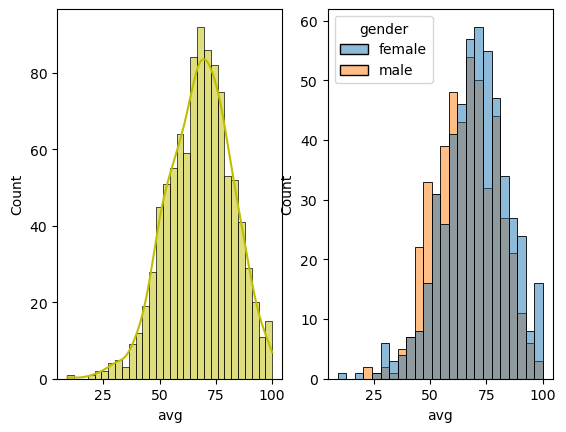

In [28]:
fig,axs=plt.subplots(1,2)
plt.subplot(121)
sns.histplot(data=df,x='avg',bins=30,kde=True,color='y')
plt.subplot(122)
sns.histplot(data=df,x='avg',hue='gender')

Female students has go the highest avg

<Axes: xlabel='avg', ylabel='Count'>

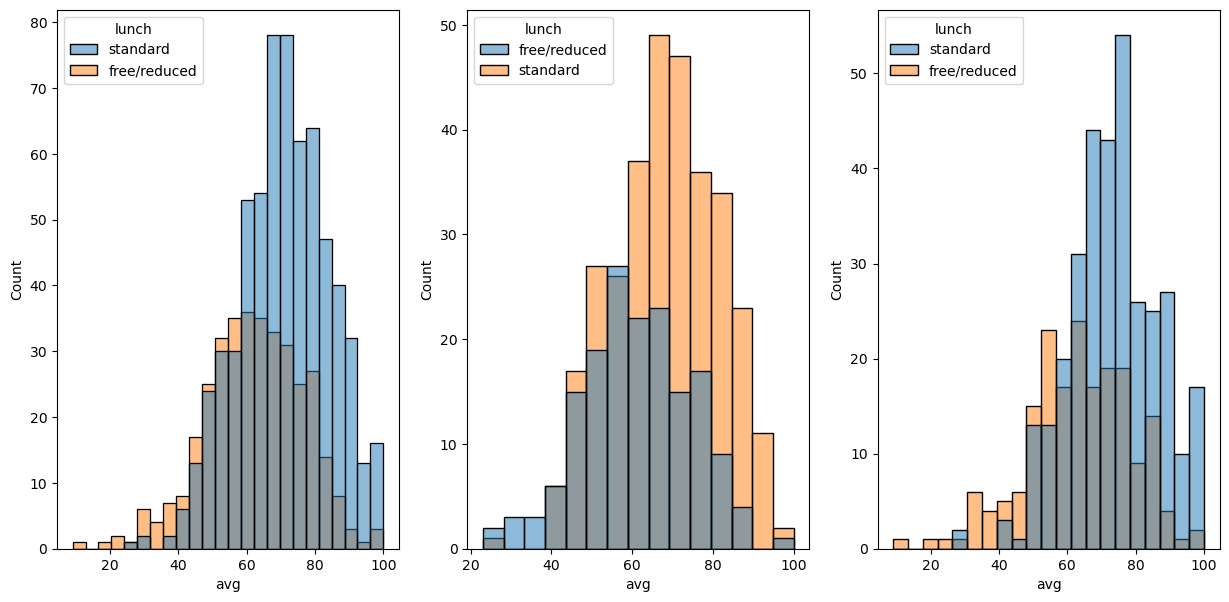

In [38]:
fig,axs=plt.subplots(1,3,figsize=(15,7))
plt.subplot(131)
sns.histplot(data=df,x='avg',hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df['gender']=='male'],x='avg',hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df['gender']=='female'],x='avg',hue='lunch')

from above graph found that students who take standard meal has scored good marks

<Axes: xlabel='avg', ylabel='Count'>

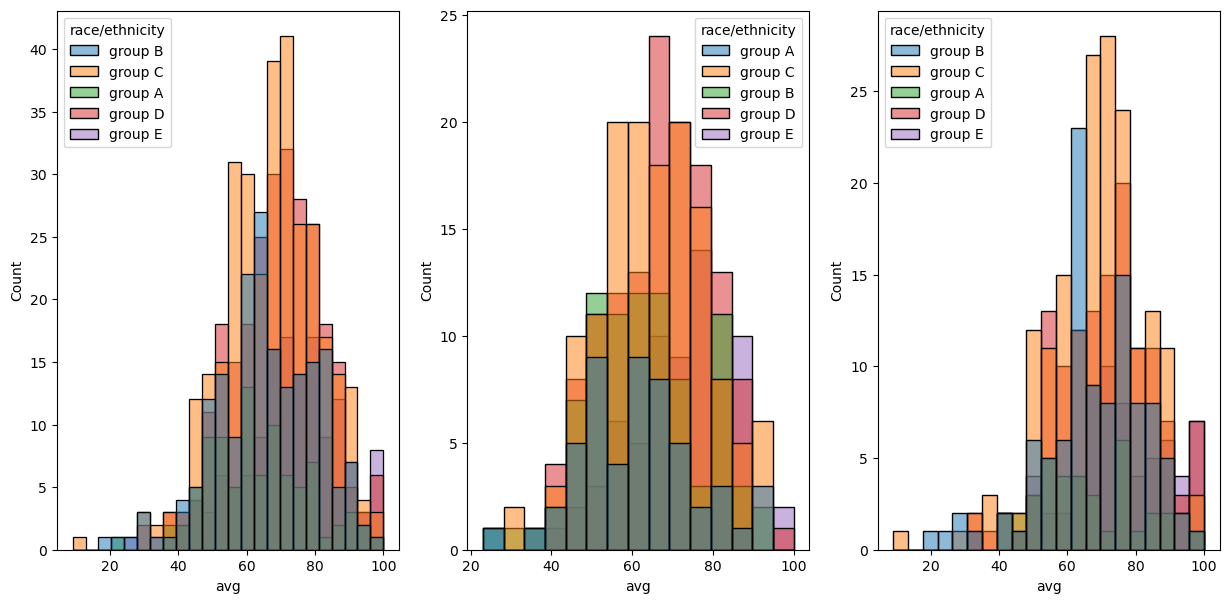

In [39]:
fig,axs=plt.subplots(1,3,figsize=(15,7))
plt.subplot(131)
sns.histplot(data=df,x='avg',hue='race/ethnicity')
plt.subplot(132)
sns.histplot(data=df[df['gender']=='male'],x='avg',hue='race/ethnicity')
plt.subplot(133)
sns.histplot(data=df[df['gender']=='female'],x='avg',hue='race/ethnicity')

group A and group B students performs poorly in both male and female

<Axes: xlabel='avg', ylabel='Count'>

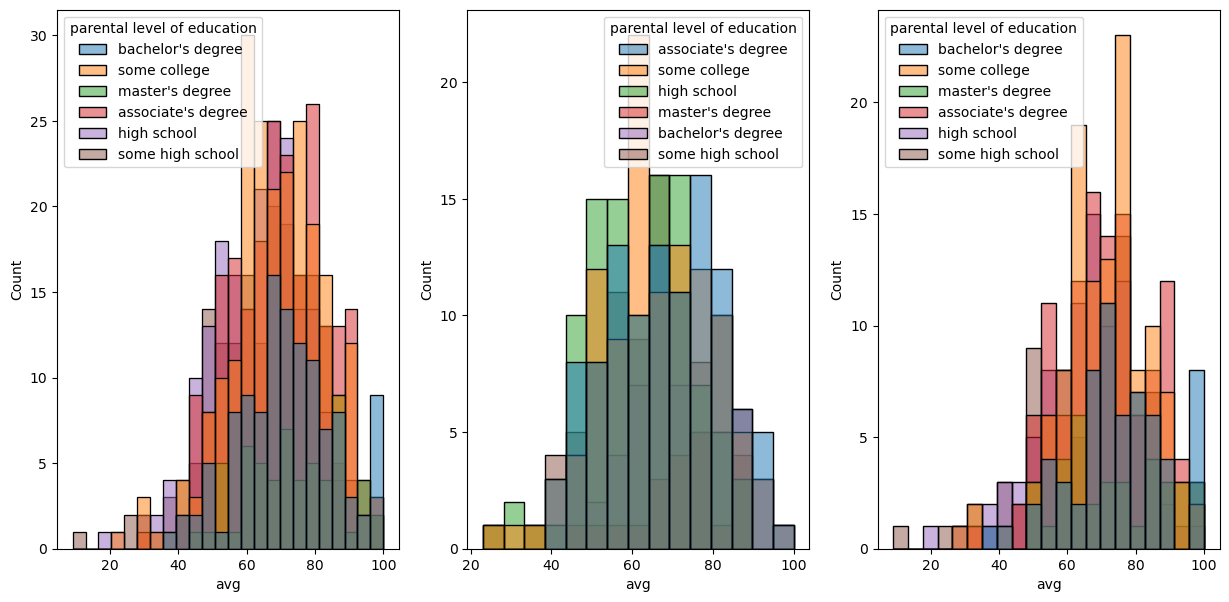

In [40]:
fig,axs=plt.subplots(1,3,figsize=(15,7))
plt.subplot(131)
sns.histplot(data=df,x='avg',hue='parental level of education')
plt.subplot(132)
sns.histplot(data=df[df['gender']=='male'],x='avg',hue='parental level of education')
plt.subplot(133)
sns.histplot(data=df[df['gender']=='female'],x='avg',hue='parental level of education')

In [ ]:
parental level of education doesn't show any changes in the marks scored

<Axes: ylabel='writing score'>

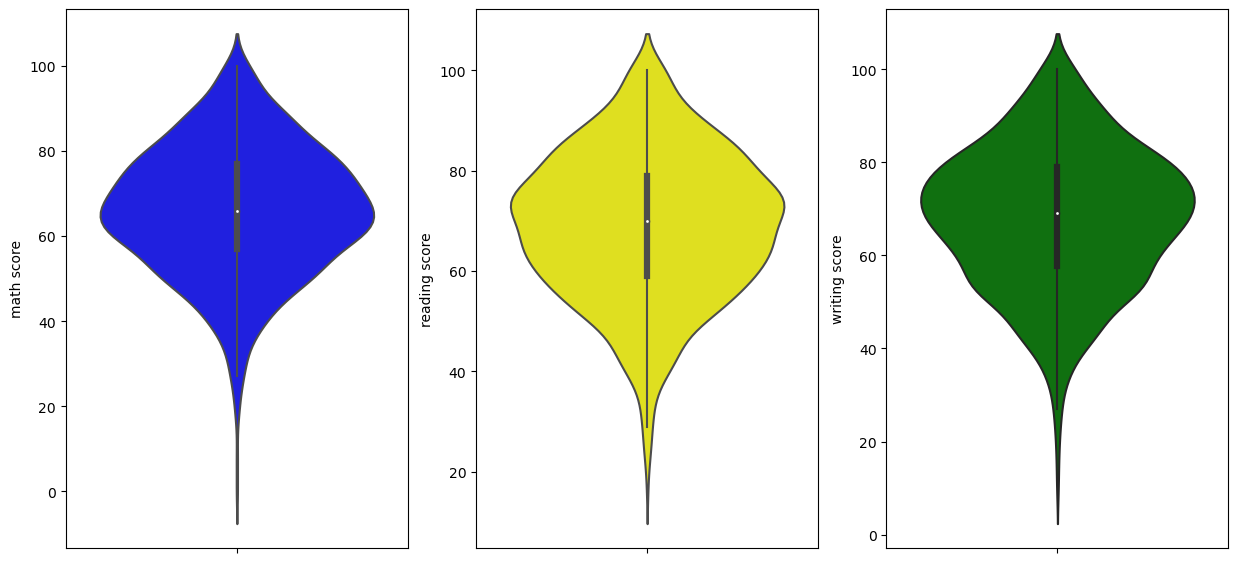

In [47]:
#Maximum score of student in all 3 subjects
plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
sns.violinplot(y='math score',data=df,color='blue')
plt.subplot(1,3,2)
sns.violinplot(y='reading score',data=df,color='yellow')
plt.subplot(1,3,3)
sns.violinplot(y='writing score',data=df,color='green')

from above graph found that max students score was in range of 60-80

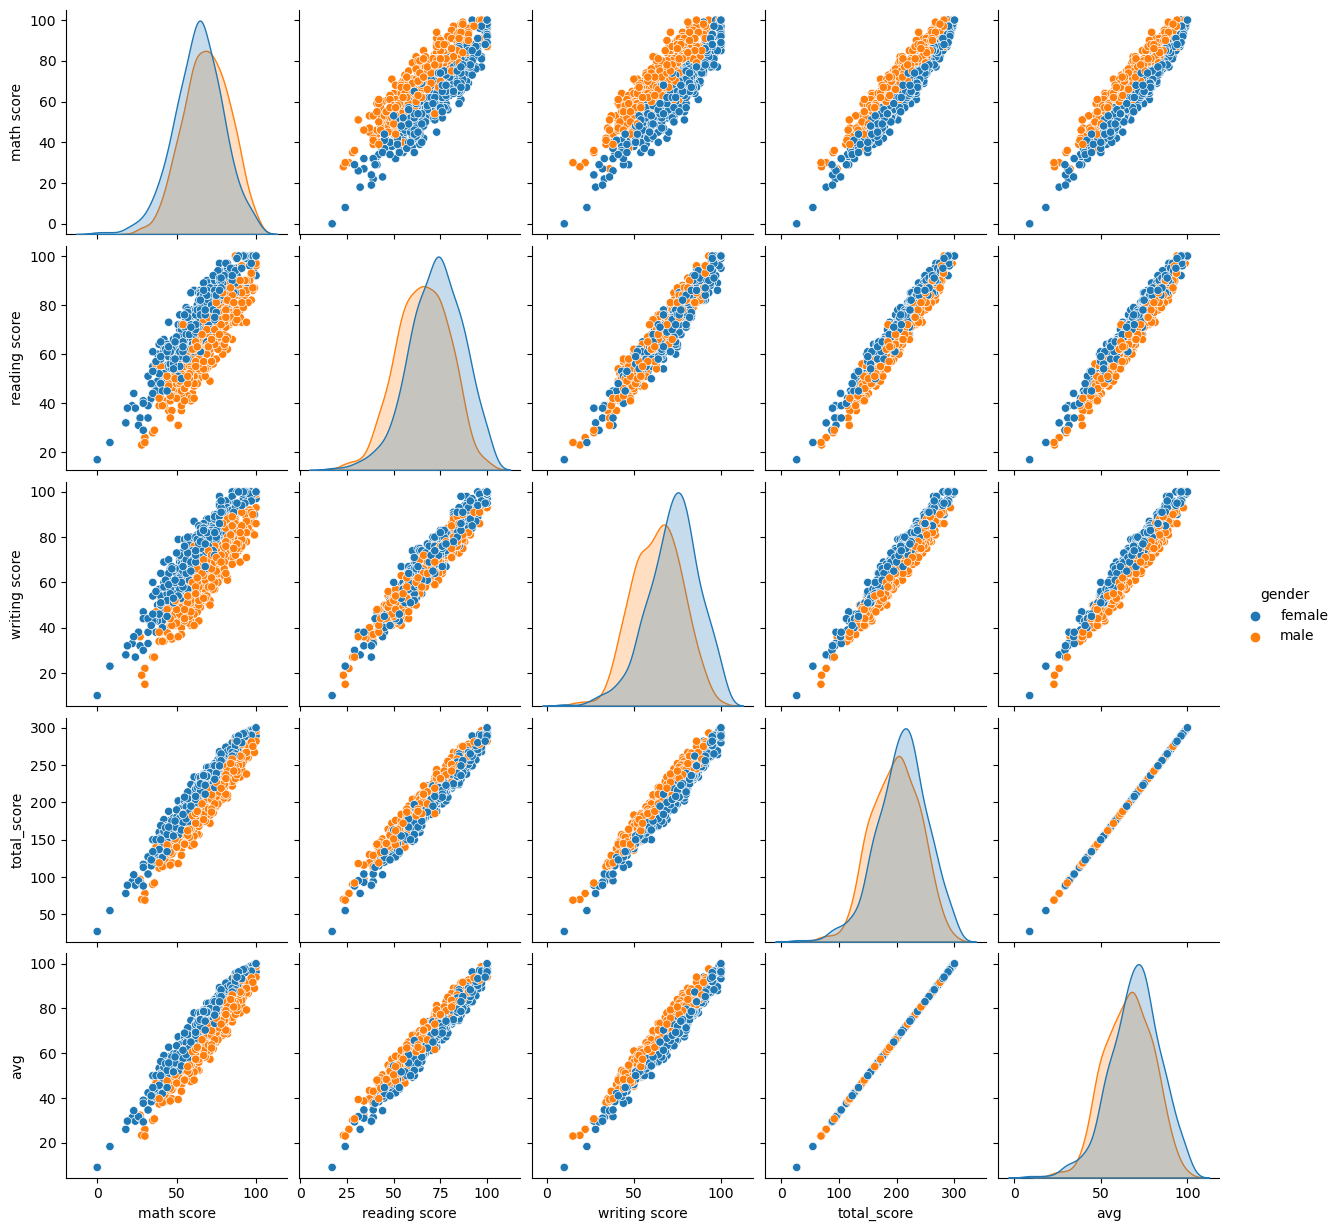

In [48]:
sns.pairplot(df,hue = 'gender')
plt.show()

# Conclusion
Student's Performance is related with lunch, race, parental level education
Females lead in pass percentage and also are top-scorers
Student's Performance is not much related with test preparation course
Finishing preparation course is benefitial

In [51]:
X=df.drop(columns=['math score','total_score','avg'],axis=1)
X

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [52]:
y=df['math score']
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [56]:
num_feat= X.select_dtypes(exclude="object").columns
cat_feat=X.select_dtypes(include='object').columns
print(f'Numerical Features : {num_feat}')
print(f'Categorical Feature : {cat_feat}')

Numerical Features : Index(['reading score', 'writing score'], dtype='object')
Categorical Feature : Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')


In [59]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
enc=OneHotEncoder()
ss=StandardScaler()

preprocessor=ColumnTransformer([
    ("OneHotEncoder",enc,cat_feat),
    ("S,ss,tandardScaler",ss,num_feat)
])




In [60]:
X=preprocessor.fit_transform(X)
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [61]:
X.shape

(1000, 19)

In [62]:
y.shape

(1000,)

In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=41)

In [67]:
X_train.shape

(800, 19)

In [71]:
pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/99.8 MB 1.6 MB/s eta 0:01:04
   ---------------------------------------- 0.2/99.8 MB 1.4 MB/s eta 0:01:11
   ---------------------------------------- 0.2/99.8 MB 1.5 MB/s eta 0:01:05
   ---------------------------------------- 0.2/99.8 MB 1.5 MB/s eta 0:01:05
   ---------------------------------------- 0.4/99.8 MB 1.5 MB/s eta 0:01:07
   ---------------------------------------- 0.6/99.8 MB 1.8 MB/s eta 0:00:55
   ---------------------------------------- 0.6/99.8 MB 1.8 MB/s eta 0:00:55
   ---------------------------------------- 0.7/99.8 MB 1.7 MB/s eta 0:00:57
   ------------------------------------

In [74]:
pip install catboost

  Obtaining dependency information for catboost from https://files.pythonhosted.org/packages/e8/37/3afd3c02798734efcd7840bfa872d3efc06f5d5c92f9613fea3ff5b4311f/catboost-1.2.3-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for graphviz from https://files.pythonhosted.org/packages/00/be/d59db2d1d52697c6adc9eacaf50e8965b6345cc143f671e1ed068818d5cf/graphviz-0.20.3-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/101.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/101.1 MB 1.7 MB/s eta 0:01:02
   ---------------------------------------- 0.1/101.1 MB 919.0 kB/s eta 0:01:50
   ---------------------------------------- 0.2/101.1 MB 1.6 MB/s eta 0:01:05
   ---------------------------------------- 0.3/101.1 MB 1.6 MB/s eta 0:01:04
   ---------------------------------------- 0.4/101.1 MB 1.9 MB/s eta 0:00:54
   ---------------------------------------- 0.6/101.1 MB 2.3 MB/s eta 0:00:45
   ---------------------------------------- 0.8

In [75]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [76]:
def evaluate_model(true,pred):
    mse=mean_squared_error(true,pred)
    mae=mean_absolute_error(true,pred)
    rmse=np.sqrt(mse)
    r2_sq=r2_score(true,pred)
    return mse,mae,rmse,r2_sq

In [79]:
models={
    'LinearRegression':LinearRegression(),
    'Decision Tree Regressor':DecisionTreeRegressor(),
    'Random Forest Regressor':RandomForestRegressor(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'XGBoost Regressor':XGBRegressor(),
    'Adaboost':AdaBoostRegressor(),
    'CatRegressor':CatBoostRegressor(verbose=False),
    'K-Neighbour Regressor':KNeighborsRegressor()
    }

In [84]:
model_list=[]
r2_list=[]
for i in range(len(list(models))):
    model = list(models.values())[i]
    #model=list(models.values())(i)
    model.fit(X_train,y_train)
    
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
    train_mse,train_mae,train_rmse,train_r2_sq=evaluate_model(y_train,y_train_pred)
    test_mse,test_mae,test_rmse,test_r2_sq=evaluate_model(y_test,y_test_pred)
    
    print(list(models.values())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(train_mae))
    print("- R2 Score: {:.4f}".format(train_r2_sq))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(test_mae))
    print("- R2 Score: {:.4f}".format(test_r2_sq))
    r2_list.append(test_r2_sq)
    
    print('*'*30)
    print('\n')

LinearRegression()
Model performance for Training set
- Root Mean Squared Error: 5.3151
- Mean Absolute Error: 4.2463
- R2 Score: 0.8808
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3851
- Mean Absolute Error: 4.2608
- R2 Score: 0.8553
******************************


DecisionTreeRegressor()
Model performance for Training set
- Root Mean Squared Error: 0.3750
- Mean Absolute Error: 0.0262
- R2 Score: 0.9994
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 8.3961
- Mean Absolute Error: 6.5150
- R2 Score: 0.6482
******************************


RandomForestRegressor()
Model performance for Training set
- Root Mean Squared Error: 2.2724
- Mean Absolute Error: 1.7830
- R2 Score: 0.9782
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.1066
- Mean Absolute Error: 4.8833
- R2 Score: 0.8139
******************************


Lasso()
Model performance for Tra

In [89]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model name','R2_Score']).sort_values(by='R2_Score',ascending=False)

,Model name,R2_Score
4,Ridge,0.855563
0,LinearRegression,0.855295
7,CatRegressor,0.828297
2,Random Forest Regressor,0.813920
5,XGBoost Regressor,0.800727
3,Lasso,0.798450
6,Adaboost,0.791914
8,K-Neighbour Regressor,0.759405
1,Decision Tree Regressor,0.648234


# LinearRegression

In [95]:
model=LinearRegression()
model=model.fit(X_train,y_train)
y_pred_model=model.predict(X_test)
acc=r2_score(y_test,y_pred_model)
print(f'Accuracy:{acc*100}')

Accuracy:85.5294832629186


# plotting

Text(0, 0.5, 'Predicted Value')

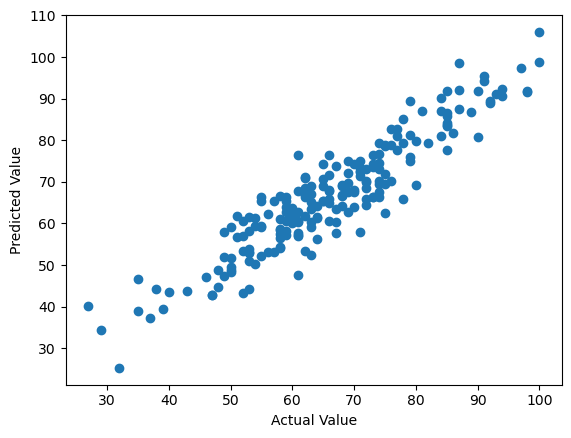

In [98]:
plt.scatter(y_test,y_pred_model)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")

<Axes: xlabel='math score'>

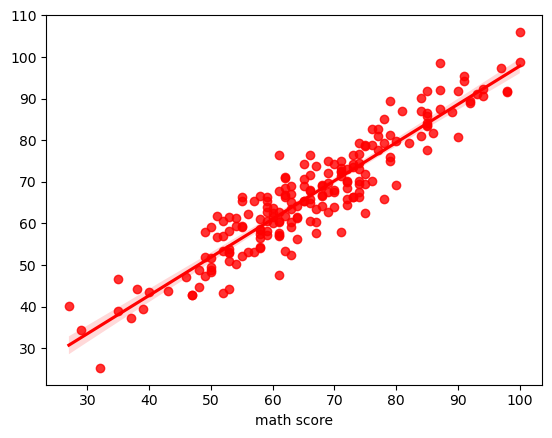

In [99]:
sns.regplot(x=y_test,y=y_pred_model,color='red')